In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import visualkeras

In [2]:
# load the data
df = pd.read_csv('updated_timetable.txt')
df.columns=['datetime','irradiation_forecast','temperature_forecast','irradiation','temperature','power']
tdi = pd.DatetimeIndex(df.datetime)
df.set_index(tdi, inplace=True)
data = df.drop(columns=['datetime','irradiation_forecast','temperature_forecast'])
df.head(-1)

,datetime,irradiation_forecast,temperature_forecast,irradiation,temperature,power
datetime,,,,,,
2012-02-03 00:00:00,02-03-12 00,0.000000,7.854629,0.174978,9.064171,0.0
2012-02-03 01:00:00,02-03-12 01,0.000000,7.724629,0.204465,8.842131,0.0
2012-02-03 02:00:00,02-03-12 02,0.000000,7.584629,0.311929,8.597083,0.0
2012-02-03 03:00:00,02-03-12 03,0.000000,7.464629,0.602606,8.368717,0.0
2012-02-03 04:00:00,02-03-12 04,0.000000,7.604629,0.725282,8.245363,0.0
...,...,...,...,...,...,...
2021-10-03 18:00:00,10-03-21 18,103.593380,5.814629,0.934466,4.898309,0.0
2021-10-03 19:00:00,10-03-21 19,19.610334,4.694629,0.770375,3.713455,0.0
2021-10-03 20:00:00,10-03-21 20,0.000000,3.454629,0.987695,2.694212,0.0


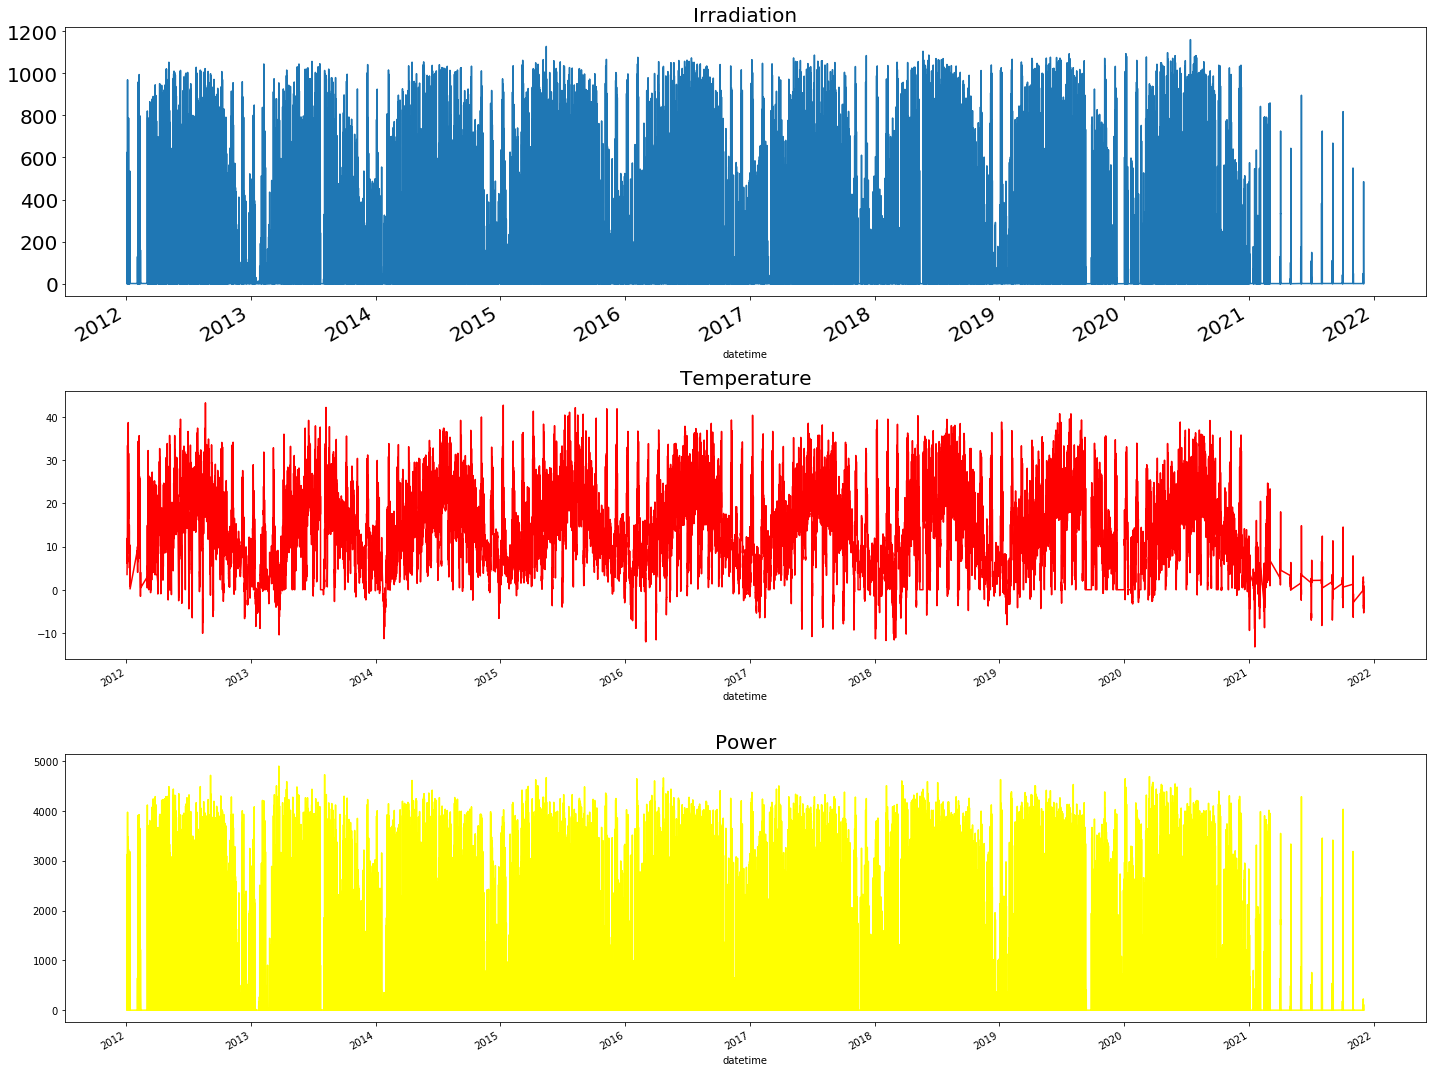

In [3]:
#initial visualization
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.title('Irradiation', fontsize=20)
data['irradiation'].plot(fontsize=20)
plt.subplot(3,1,2)
plt.title('Temperature', fontsize=20)
data['temperature'].plot(c='red')
plt.subplot(3,1,3)
plt.title('Power', fontsize=20)
data['power'].plot(c='yellow')
plt.tight_layout()

In [4]:
#gathering data in the form of a pandas datastructure 
timetable = pd.read_csv("updated_timetable.txt")
timetable.columns = ['datetime','irradiation_forecast','temperature_forecast','irradiation','temperature','power']
timetable = pd.DataFrame(timetable)
power = timetable.loc[:,'power']
power = power/np.max(power)
power = power*317000
timetable.head(-1)

,datetime,irradiation_forecast,temperature_forecast,irradiation,temperature,power
0,02-03-12 00,0.000000,7.854629,0.174978,9.064171,0.0
1,02-03-12 01,0.000000,7.724629,0.204465,8.842131,0.0
2,02-03-12 02,0.000000,7.584629,0.311929,8.597083,0.0
3,02-03-12 03,0.000000,7.464629,0.602606,8.368717,0.0
4,02-03-12 04,0.000000,7.604629,0.725282,8.245363,0.0
...,...,...,...,...,...,...
79098,10-03-21 18,103.593380,5.814629,0.934466,4.898309,0.0
79099,10-03-21 19,19.610334,4.694629,0.770375,3.713455,0.0
79100,10-03-21 20,0.000000,3.454629,0.987695,2.694212,0.0
79101,10-03-21 21,0.000000,2.124629,0.987637,1.834956,0.0


In [5]:
#min-max normalization
scaler = MinMaxScaler()
power = power.values.reshape(-1,1)
power = scaler.fit_transform(power)

temperature = timetable.loc[:,'temperature']
scaler_at = MinMaxScaler()
temperature = temperature.values.reshape(-1,1)
temperature = scaler_at.fit_transform(temperature)

temperature_forecast = timetable.loc[:,'temperature_forecast']
scaler_model = MinMaxScaler()
temperature_forecast = temperature_forecast.values.reshape(-1,1)
temperature_forecast = scaler_model.fit_transform(temperature_forecast)

irradiation_forecast = timetable.loc[:,'irradiation_forecast']
scaler_m = MinMaxScaler()
irradiation_forecast = irradiation_forecast.values.reshape(-1,1)
irradiation_forecast = scaler_m.fit_transform(irradiation_forecast)

irradiation = timetable.loc[:,'irradiation']
scaler_w = MinMaxScaler()
irradiation = irradiation.values.reshape(-1,1)
irradiation = scaler_w.fit_transform(irradiation)

In [6]:
#Pandas table arrangement for forecasting purposes (includes shifting)
timetable_scaled = pd.concat([pd.DataFrame(irradiation_forecast),pd.DataFrame(temperature_forecast),
                              pd.DataFrame(irradiation),pd.DataFrame(temperature),pd.DataFrame(power)], axis = 1)
power_t = pd.DataFrame(timetable_scaled.iloc[:,4])
power_t = pd.concat([pd.DataFrame(timetable.iloc[:,0]),power_t,pd.DataFrame(timetable_scaled.iloc[:,0]),pd.DataFrame(timetable_scaled.iloc[:,1])],axis = 1)
power_t.columns = ['datetime','power','irradiation_forecast','temperature_forecast']
variables = pd.concat([pd.DataFrame(timetable.iloc[:,0]),pd.DataFrame(timetable_scaled.iloc[:,2:5])],axis = 1)
shift_1 = variables.shift(1,axis = 0)
shift_1.columns = ['datetime(t-1)','irradiation(t-1)','temperature(t-1)','power(t-1)']
final_table = pd.concat([power_t,shift_1],axis = 1)
final_table = final_table.dropna(axis=0)
final_table = final_table.drop(['datetime(t-1)'], axis=1)
final_table = final_table.drop(['temperature(t-1)'], axis=1)
final_table = final_table.drop(['temperature_forecast'], axis=1)
final_table.head(10)

,datetime,power,irradiation_forecast,irradiation(t-1),power(t-1)
1,02-03-12 01,0.000000,0.010489,0.000151,0.000000
2,02-03-12 02,0.000000,0.010489,0.000176,0.000000
3,02-03-12 03,0.000000,0.010489,0.000269,0.000000
4,02-03-12 04,0.000000,0.010489,0.000519,0.000000
5,02-03-12 05,0.000000,0.010489,0.000625,0.000000
6,02-03-12 06,0.000000,0.010489,0.000326,0.000000
7,02-03-12 07,0.003841,0.010489,0.000528,0.000000
8,02-03-12 08,0.026752,0.011647,0.005635,0.003841
9,02-03-12 09,0.040653,0.088345,0.026401,0.026752
10,02-03-12 10,0.069965,0.160950,0.038190,0.040653


In [7]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(input_par,output, n_steps):
	X, y = list(), list()
	for i in range(len(input_par)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(input_par):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = input_par[i:end_ix,:], output[end_ix-1,:]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



In [8]:
#test-train split

n = round(0.2*len(final_table))

def random_split(seq, n):
    import random
#     random.seed( 30 )
    x = list()
    index = random.randrange(len(seq))
    x = seq[index:index+n]
    return x, index
    

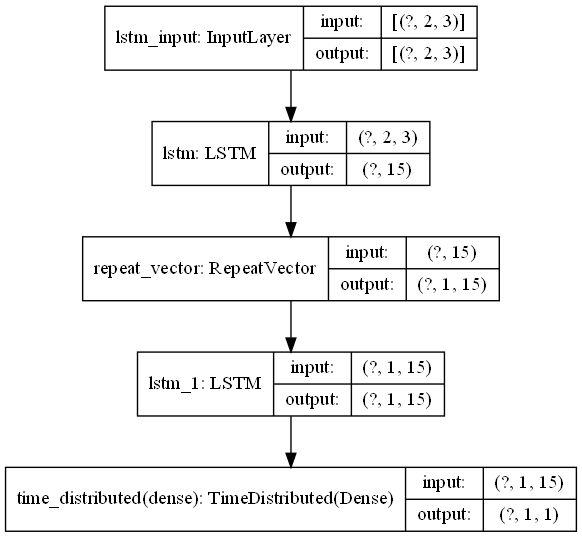

In [9]:
n_steps = 2
n_features = 3
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

# define model
model_ae = Sequential()
model_ae.add(LSTM(15, activation='relu', input_shape=(n_steps, n_features)))
model_ae.add(RepeatVector(1))
model_ae.add(LSTM(15, activation='relu', return_sequences=True))
model_ae.add(TimeDistributed(Dense(1)))
model_ae.compile(optimizer='adam', loss='mse')
plot_model(model_ae, show_shapes=True, rankdir = 'TB',show_layer_names=True, expand_nested = False, dpi=100, to_file='predict_lstm_autoencoder.png')
# visualkeras.layered_view(model_ae).show() # display using your system viewer

In [242]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

n_iter = 1
ndays = 1
s_day = 24*ndays

rms_ae = np.zeros(n_iter, dtype= float)
mae_ae = np.zeros(n_iter, dtype= float)
mean_forecast_errors_ae = np.zeros(n_iter, dtype= float)

for i in range(0, n_iter):


    test_set, index = random_split(final_table,n)
    train_set = final_table.drop(final_table.index[index:index+n])
    
    
    input_sp = train_set.iloc[:,2:5]
    output_sp = pd.DataFrame(train_set.loc[:,'power'])
    
    X_sp, y_sp = split_sequences(input_sp.values,output_sp.values, n_steps)
    y_sp = y_sp.reshape((y_sp.shape[0], y_sp.shape[1],1))
    
    history_ae = model_ae.fit(X_sp, y_sp, epochs=25, batch_size= 24, verbose=0)
    history_ae.history.keys()
    # convert into input/output

    x_eval = test_set.iloc[:,2:5]
    y_eval = pd.DataFrame(test_set.loc[:,'power'])
    x_eval_tot  = x_eval[0:s_day+1].values
    y_eval_tot  = y_eval[0:s_day+1].values
    y_eval_tot = y_eval_tot.reshape(-1,1)
    X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
    yhat_sp = model_ae.predict(X_check_tot, verbose=0)
    yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
    
    yhat_act_wp = scaler.inverse_transform(yhat_sp)
    y_check_act_wp = scaler.inverse_transform(y_check_tot)
    
    rms_ae[i] = np.sqrt(mean_squared_error(yhat_act_wp, y_check_act_wp))
    mae_ae[i] = mean_absolute_error(yhat_act_wp, y_check_act_wp)
    forecast_errors_ae = [yhat_act_wp[k] - y_check_act_wp[k] for k in range(len(yhat_act_wp))]
    mean_forecast_errors_ae[i] = np.mean(forecast_errors_ae)


In [260]:
mae_ae

array([3784.42199216])

In [255]:

m = 25

test, index = random_split(test_set,m)
x_eval = test.iloc[:,2:5]
y_eval = pd.DataFrame(test.loc[:,'power'])
x_eval_tot  = x_eval[0:s_day+1].values
y_eval_tot  = y_eval[0:s_day+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)

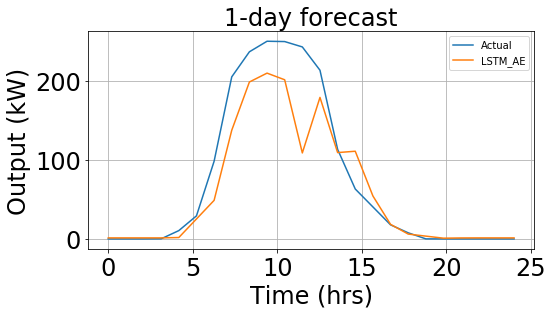

In [256]:
t = np.linspace(0,24,24) 
plt.figure(figsize=(8,4))
plt.plot(t,y_check_act_wp/1000, linewidth=1.5)
plt.plot(t,yhat_act_wp /1000, linewidth=1.5)
plt.tick_params(axis='x', labelsize = 24)
plt.tick_params(axis='y', labelsize = 24)
plt.title('1-day forecast', fontsize = 24)
plt.ylabel('Output (kW)', fontsize = 24)
plt.xlabel('Time (hrs)', fontsize = 24)
plt.legend(['Actual','LSTM_AE'], loc='upper right')
plt.savefig(fname = "fig4.png", dpi=400,orientation='portrait')
plt.grid(b = True)
plt.show() 

In [15]:
days = 30
s_days = 24*days
x_eval = test_set.iloc[:,2:5]
y_eval = pd.DataFrame(test_set.loc[:,'power'])
x_eval_tot  = x_eval[0:s_days+1].values
y_eval_tot  = y_eval[0:s_days+1].values
y_eval_tot = y_eval_tot.reshape(-1,1)
X_check_tot, y_check_tot = split_sequences(x_eval_tot,y_eval_tot, n_steps)
yhat_sp = model_ae.predict(X_check_tot, verbose=0)
yhat_sp = yhat_sp.reshape((yhat_sp.shape[0], 1))
yhat_act_wp = scaler.inverse_transform(yhat_sp)
y_check_act_wp = scaler.inverse_transform(y_check_tot)
error = yhat_act_wp - y_check_act_wp

In [ ]:
rms_ae = np.sqrt(mean_squared_error(yhat_act_wp, y_check_act_wp))
mae_ae = mean_absolute_error(yhat_act_wp, y_check_act_wp)
forecast_errors_ae = [yhat_act_wp[k] - y_check_act_wp[k] for k in range(len(yhat_act_wp))]
mean_forecast_errors_ae[i] = np.mean(forecast_errors_ae)

In [ ]:
print(rms_ae,mae_ae,mean_forecast_errors_ae)

In [ ]:
month_predicted_data = pd.concat([pd.DataFrame(yhat_act_wp),pd.DataFrame(y_check_act_wp),pd.DataFrame(error)], axis = 1)
month_predicted_data.columns = ['Predicted','Actual','error']

In [ ]:
dates = pd.DataFrame(test_set.iloc[1:s_days+1,0])
irr_pred = test_set.iloc[1:s_days+1,2].values
irr_pred = irr_pred.reshape(-1,1)
irr_ppred = scaler_m.inverse_transform(irr_pred)
irr_ppred = pd.DataFrame(irr_ppred)
dates = pd.concat([pd.DataFrame(dates.values),irr_ppred,month_predicted_data],axis=1)
dates.columns = ['datetime','irradiation_prediction','Predicted_Power_Watts','Actual_Power_Watts','error']
dates.head(-1)

In [ ]:
dates.to_csv('1_hour_317kW.csv',index=False)

In [ ]:
test_set.head()

In [ ]:
test_set['datetime'] = pd.to_datetime(test_set['datetime'])